In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
# import utils
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
from scipy.stats import norm
from utils import style
style("seaborn-bright", tex=True)

In [2]:
from utils import load_spectral_types, safe_mkdir

In [3]:
# root data directory path
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [4]:
# create directory "Spectral-Class" in Data dir, if it doesn't exist
name = "Spectral-Class-v"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Spectral-Class-v already exist. Good to go!


In [5]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour-2")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour-2/gaia-neighbour-2.hdf5']

In [6]:
# load best pars data
df = vaex.open(files[0])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,2.1613254142300296,-0.5358186393427844,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.79699993,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,1.7350472211837769,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.83500004,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,2.168515313114387,-0.5628743542169623,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,M,--,nan,nan,--,3588.7626953125,3.59375,3.5283203125,0.0,gspphot,4.771900177001953,0.008300304412841797,0.006099700927734375,0.0,gspphot,-0.03759999945759773,0.016300000250339508,0.017299998551607132,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.517775929900683,11.088201928281167,0.03598627036182269,0.03672364252112022,9.038465645687793,13.464342663600737,0.05323251028082858,0.07183479882735357,nan,nan,nan,nan,nan,nan,nan,nan
3,0.016341378160082746,-1.479983459874883,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,2.16772823088462,-0.5622315617141247,29.8859,29.8674,29.9026,0.0,0.0,1e-04,M,--,16.0080623626709,1.5245096683502197,gaia,3156.3876953125,0.260009765625,0.33251953125,0.0,gspphot,4.99630022048

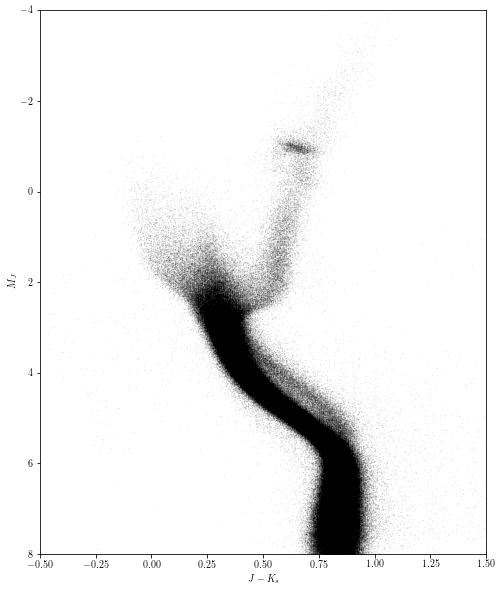

In [9]:
# HR diagram
JK = np.linspace(0, 0.86, 100)
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.5, 1.5)
plt.ylim(-4, 8)
plt.gca().invert_yaxis()
# to save it, uncomment the following line
# plt.savefig(join(gaia_dir, "HR-diagram.pdf"), format="pdf", dpi=70)
plt.show()

In [7]:
# load spectral type classification
df_s = load_spectral_types(root_data_dir)
df_s

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [20]:
df_s[df_s['SpT'] == "G2V"]

,SpT,M_J,J-H,H-Ks,J-K
39,G2V,3.6,0.293,0.073,0.366


In [8]:
# save classification it into numpy array
jk = df_s["J-K"].to_numpy()
mj = df_s["M_J"].to_numpy()
# cut it below M_J < 5
check = mj < 5
jk = jk[check]
mj = mj[check]

In [9]:
# hand drawn boundaries, need improvement
up_x = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
up_y = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

low_x = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
low_y = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [10]:
# interpolate the boundaries, to make it smooth
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(up_x, up_y, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(low_x, low_y, fill_value="extrapolate")(jks)+0.15

In [11]:
# interpolated boundaries
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df.extract()

df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.010526307611580561,-1.5069479765134466,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,2.1613254142300296,-0.5358186393427844,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.79699993,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095,5.274227298919868,5.724228230022163
1,0.009947399351986562,-1.4741853713800026,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,1.7350472211837769,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.83500004,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995,5.4159946919053255,5.843852436790257
2,0.010653943539778906,-1.4792054270009287,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,2.168515313114387,-0.5628743542169623,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,M,--,nan,nan,--,3588.7626953125,3.59375,3.5283203125,0.0,gspphot,4.771900177001953,0.008300304412841797,0.006099700927734375,0.0,gspphot,-0.03759999945759773,0.016300000250339508,0.017299998551607132,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.517775929900683,11.088201928281167,0.03598627036182269,0.03672364252112022,9.038465645687793,13.464342663600737,0.05323251028082858,0.07183479882735357,nan,nan,nan,nan,nan,nan,nan,nan,5.349391633886626,5.786087504740863
3,0.016341378160082746,-1.479983459874883,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,2.16772823088462,-0.5622315617141247,29.8859,29.8674,29.9026,0

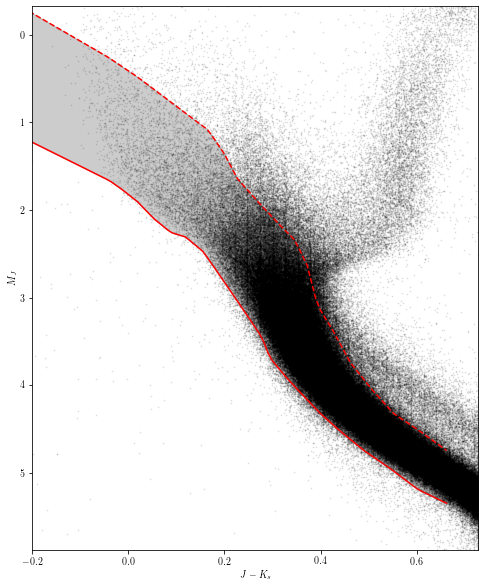

In [12]:
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
# df_rv.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.fill_between(jks, j_upper, j_lower, alpha=0.2, color="k")
# plt.plot(jks, j_upper-1.4, 'r')
plt.plot(jks, j_lower, 'r--')
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
plt.show()

In [16]:
p = 2
jk_s_stretch = np.linspace(0, 0.5**p, 14)
jk_s = np.power(jk_s_stretch, 1/p)-0.1
[np.round(jk,2) for jk in zip(jk_s[:-1], jk_s[1:])]

[array([-0.1 ,  0.04]),
 array([0.04, 0.1 ]),
 array([0.1 , 0.14]),
 array([0.14, 0.18]),
 array([0.18, 0.21]),
 array([0.21, 0.24]),
 array([0.24, 0.27]),
 array([0.27, 0.29]),
 array([0.29, 0.32]),
 array([0.32, 0.34]),
 array([0.34, 0.36]),
 array([0.36, 0.38]),
 array([0.38, 0.4 ])]

gaia_(-0.10)_(0.04).hdf5 977


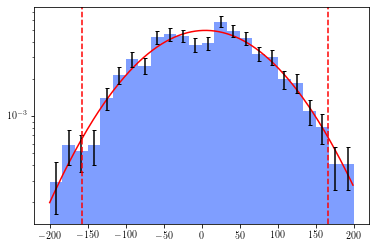

-156.77820954354792 166.26741292413118
162.0
gaia_(0.04)_(0.10).hdf5 1106


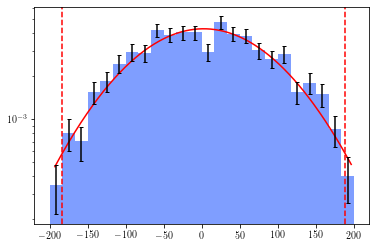

-183.18205246928954 188.14047156181783
186.0
gaia_(0.10)_(0.14).hdf5 1212


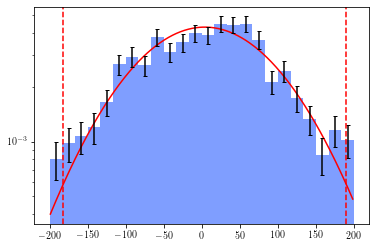

-182.30905119154855 190.0864358628755
186.0
gaia_(0.14)_(0.18).hdf5 1478


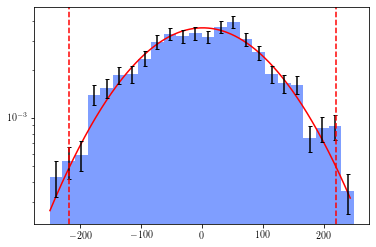

-217.85796173759385 221.08795326861437
219.0
gaia_(0.18)_(0.21).hdf5 2340


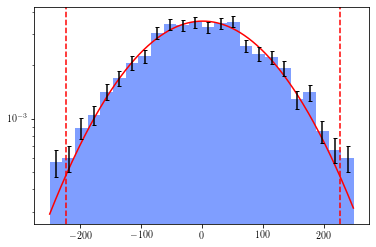

-223.1054360901123 226.27807155921428
225.0
gaia_(0.21)_(0.24).hdf5 3273


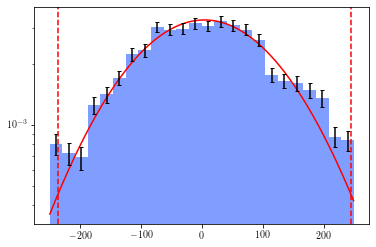

-236.95969297072804 245.69250306216605
241.0
gaia_(0.24)_(0.27).hdf5 4290


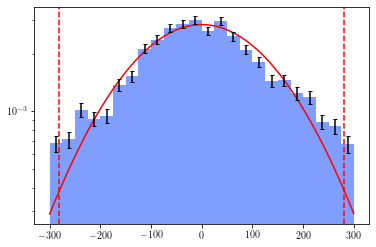

-280.7756655244536 280.9336560574358
281.0
gaia_(0.27)_(0.29).hdf5 5550


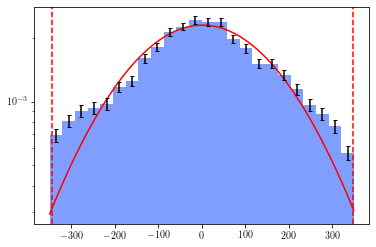

-344.38144277991364 347.5778523715235
346.0
gaia_(0.29)_(0.32).hdf5 6406


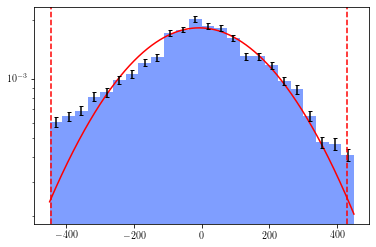

-445.3314214428038 430.0350845105383
438.0
gaia_(0.32)_(0.34).hdf5 6803


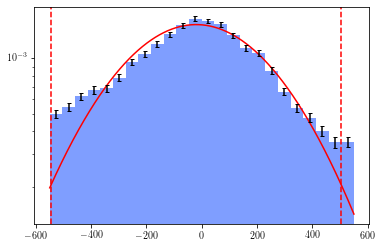

-543.6999168878115 503.2300756081245
523.0
gaia_(0.34)_(0.36).hdf5 7204


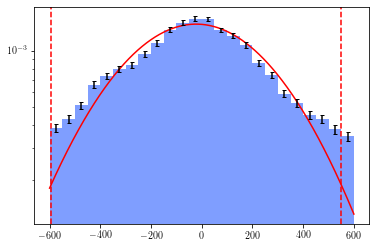

-594.5998156057267 550.386779216461
572.0
gaia_(0.36)_(0.38).hdf5 7467


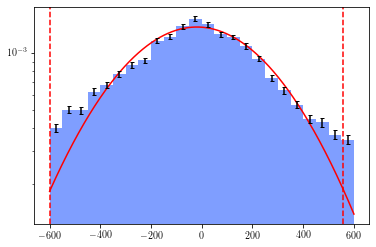

-597.0104381885616 558.0804221886341
578.0
gaia_(0.38)_(0.40).hdf5 6445


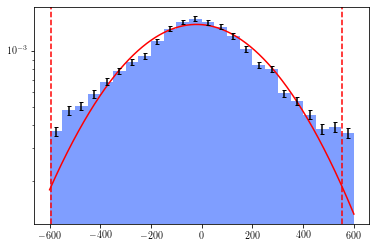

-593.193325888654 551.9438057444604
573.0


In [27]:
from scipy.optimize import curve_fit

zbounds = np.arange(150, 1001, 50)

zbs = []
sig = 2
for index in range(len(jk_s)-1):
    jk_low, jk_high = jk_s[index], jk_s[index+1]
    z_low = 0
    z_high = 0
    for i, zbound in enumerate(zbounds):
        df_mask = df.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zbound}")
        df_mask = df_mask.extract()
        df_mask["M_J_lower"] = j_lower_interp(df_mask["JK"].to_numpy())
        df_mask["M_J_upper"] = j_upper_interp(df_mask["JK"].to_numpy())
        df_mask["M_J_lower"] = df_mask["M_J_lower"].astype("float64")
        df_mask["M_J_upper"] = df_mask["M_J_upper"].astype("float64")
        df_mask = df_mask.filter("M_J < M_J_upper").filter("M_J > M_J_lower")
        df_mask = df_mask.extract()
        if i == 0:
            name = f"gaia_({jk_low:.2f})_({jk_high:.2f}).hdf5"
            print(name, len(df_mask))
        # df_mask.viz.histogram("z", shape=25, n="normalize")
        zs = df_mask["z"].to_numpy()
        zs = np.sort(zs)
        zcum = np.arange(len(zs))/len(zs)
        popt, pcov = curve_fit(lambda x, mu, sigma: norm.cdf(x, loc=mu, scale=sigma), zs, zcum, p0=[0, 80])
        mu, sigma = popt

        zedge = np.linspace(-zbound, zbound, 25)
        zmid = (zedge[1:]+zedge[:-1])/2
        dz = np.diff(zedge)[0]
        znum, _ = np.histogram(zs, bins=zedge)
        zerr = np.sqrt(znum)
        area = znum.sum()*dz
        zdens, zerr = znum/area, zerr/area
        zlow = mu-sig*sigma
        zhigh = mu+sig*sigma
        if zlow > -zbound and zhigh < zbound:
            z_low = zlow
            z_high = zhigh
            break
    plt.plot(zs, norm.pdf(zs, loc=popt[0], scale=popt[1]), 'r')
    plt.bar(zmid, zdens, yerr=zerr, width=dz, alpha=0.5, capsize=2)
    plt.axvline(zlow, c='r', ls='--')
    plt.axvline(zhigh, c='r', ls='--')        
    plt.yscale("log")
    plt.show()
    print(z_low, z_high)
    zb = (z_high-z_low)/2
    zb = np.round(zb)
    print(zb)
    zbs.append(zb)

In [28]:
zbs

[162.0,
 186.0,
 186.0,
 219.0,
 225.0,
 241.0,
 281.0,
 346.0,
 438.0,
 523.0,
 572.0,
 578.0,
 573.0]

gaia_(-0.10)_(0.04).hdf5 995
995


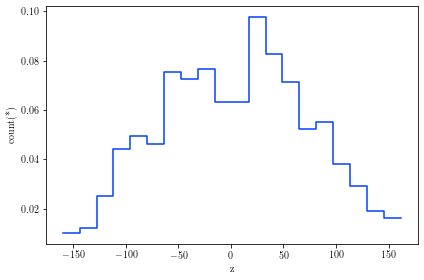

export(hdf5) [########################################] 100.00% elapsed time  :    13.79s =  0.2m =  0.0h
 gaia_(0.04)_(0.10).hdf5 1186
1186


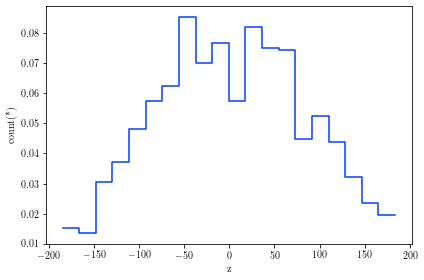

export(hdf5) [########################################] 100.00% elapsed time  :    13.93s =  0.2m =  0.0h
 gaia_(0.10)_(0.14).hdf5 1311
1311


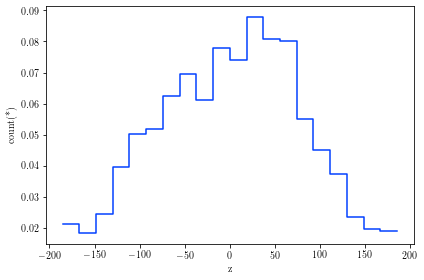

export(hdf5) [########################################] 100.00% elapsed time  :    11.48s =  0.2m =  0.0h   
 gaia_(0.14)_(0.18).hdf5 1731
1731


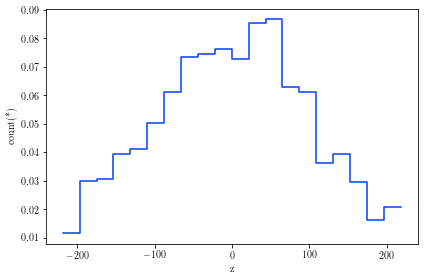

export(hdf5) [########################################] 100.00% elapsed time  :    11.78s =  0.2m =  0.0h 
 gaia_(0.18)_(0.21).hdf5 2787
2787


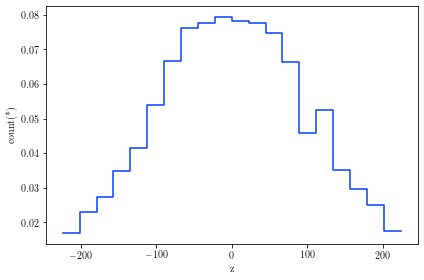

export(hdf5) [########################################] 100.00% elapsed time  :     8.93s =  0.1m =  0.0h  
 gaia_(0.21)_(0.24).hdf5 4118
4118


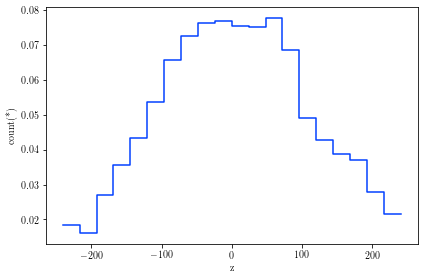

export(hdf5) [########################################] 100.00% elapsed time  :     7.66s =  0.1m =  0.0h      
 gaia_(0.24)_(0.27).hdf5 5963
5963


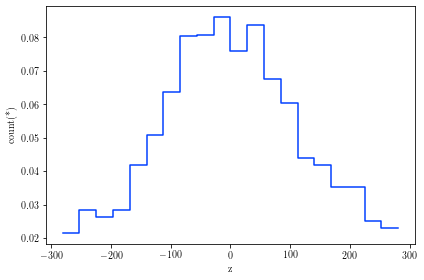

export(hdf5) [########################################] 100.00% elapsed time  :     7.00s =  0.1m =  0.0h 
 gaia_(0.27)_(0.29).hdf5 9117
9117


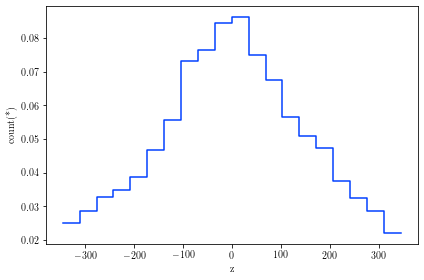

export(hdf5) [########################################] 100.00% elapsed time  :     6.65s =  0.1m =  0.0h  
 gaia_(0.29)_(0.32).hdf5 12553
12553


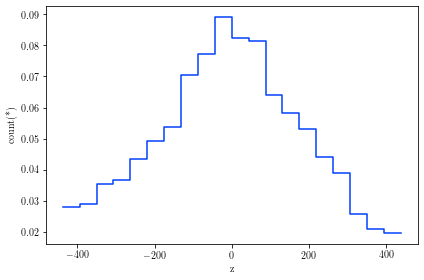

export(hdf5) [########################################] 100.00% elapsed time  :     7.42s =  0.1m =  0.0h    
 gaia_(0.32)_(0.34).hdf5 15019
15019


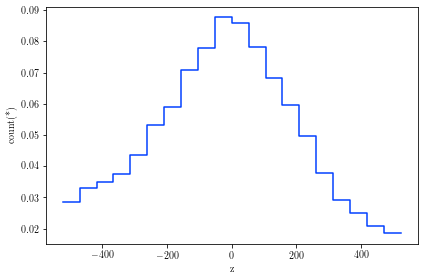

export(hdf5) [########################################] 100.00% elapsed time  :     7.31s =  0.1m =  0.0h    
 gaia_(0.34)_(0.36).hdf5 17238
17238


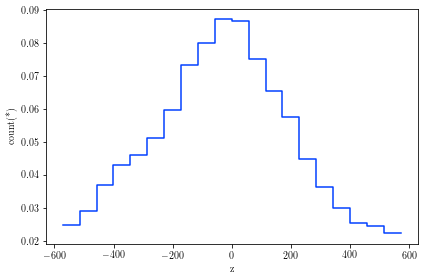

export(hdf5) [########################################] 100.00% elapsed time  :     6.36s =  0.1m =  0.0h     
 gaia_(0.36)_(0.38).hdf5 18237
18237


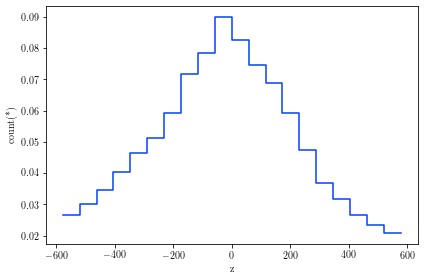

export(hdf5) [########################################] 100.00% elapsed time  :     6.11s =  0.1m =  0.0h      
 gaia_(0.38)_(0.40).hdf5 15348
15348


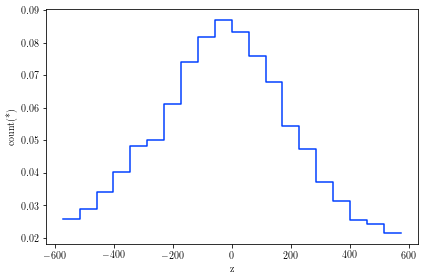

export(hdf5) [########################################] 100.00% elapsed time  :     6.54s =  0.1m =  0.0h 
 

In [29]:
df_mask = []

for jk_low, jk_high, zb in zip(jk_s[:-1], jk_s[1:], zbs):
    # print(jk_low, jk_high)
    df_mask = df.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zb}")
    df_mask = df_mask.extract()
    df_mask["M_J_lower"] = j_lower_interp(df_mask["JK"].to_numpy())
    df_mask["M_J_upper"] = j_upper_interp(df_mask["JK"].to_numpy())
    df_mask["M_J_lower"] = df_mask["M_J_lower"].astype("float64")
    df_mask["M_J_upper"] = df_mask["M_J_upper"].astype("float64")
    df_mask = df_mask.filter("M_J < M_J_upper").filter("M_J > M_J_lower")
    name = f"gaia_({jk_low:.2f})_({jk_high:.2f}).hdf5"
    print(name, len(df_mask))
    plt.figure()
    df_mask.viz.histogram("z", shape=20, n="normalize")
    zs = df_mask["z"].to_numpy()
    print(len(zs))
    plt.show()
    df_mask.export_hdf5(join(data_dir, name), progress=True)
